<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/DECISION_TREE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_excel("/content/heart_disease.xlsx")
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [ ]:
# 2. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check for missing values
print(df.isnull().sum())

age             0
Age in years    0
dtype: int64


In [ ]:
# Basic statistics
print(df.describe())

           age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1


In [ ]:
numeric_df = df.select_dtypes(include='number')
print("Numeric columns:", numeric_df.columns.tolist())
print("Shape of numeric DataFrame:", numeric_df.shape)

Numeric columns: []
Shape of numeric DataFrame: (12, 0)


In [ ]:
# Encode non-numeric columns
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

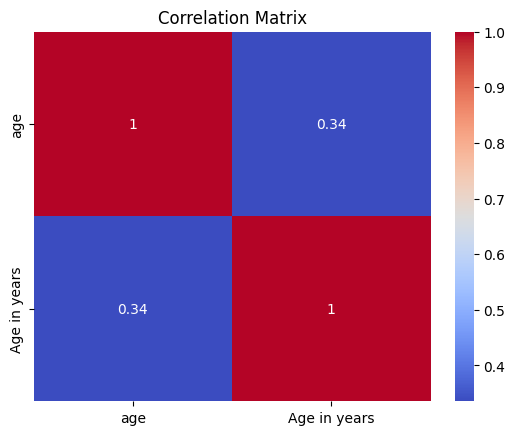

In [ ]:
# Correlation on newly encoded DataFrame
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

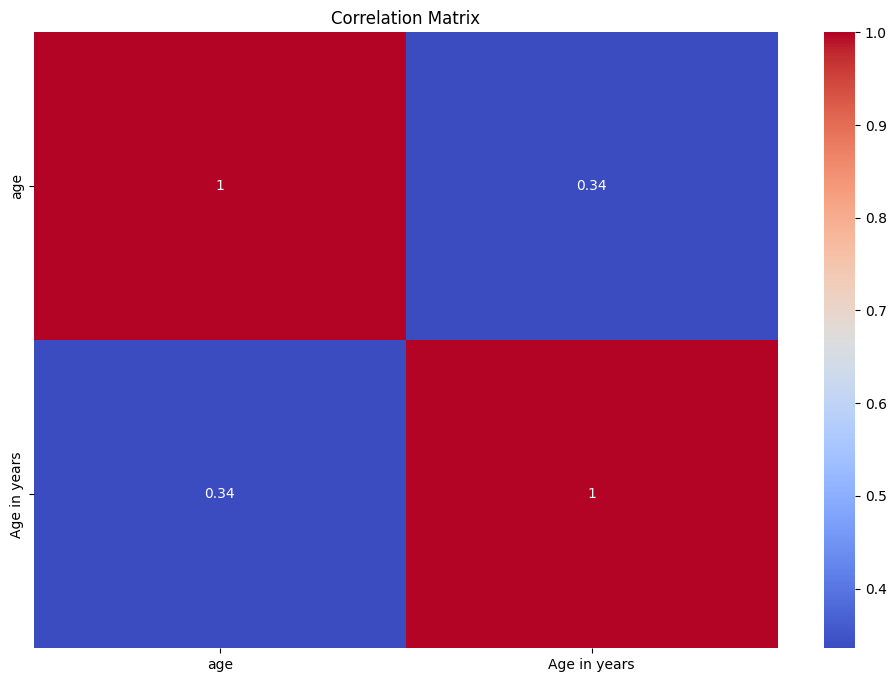

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

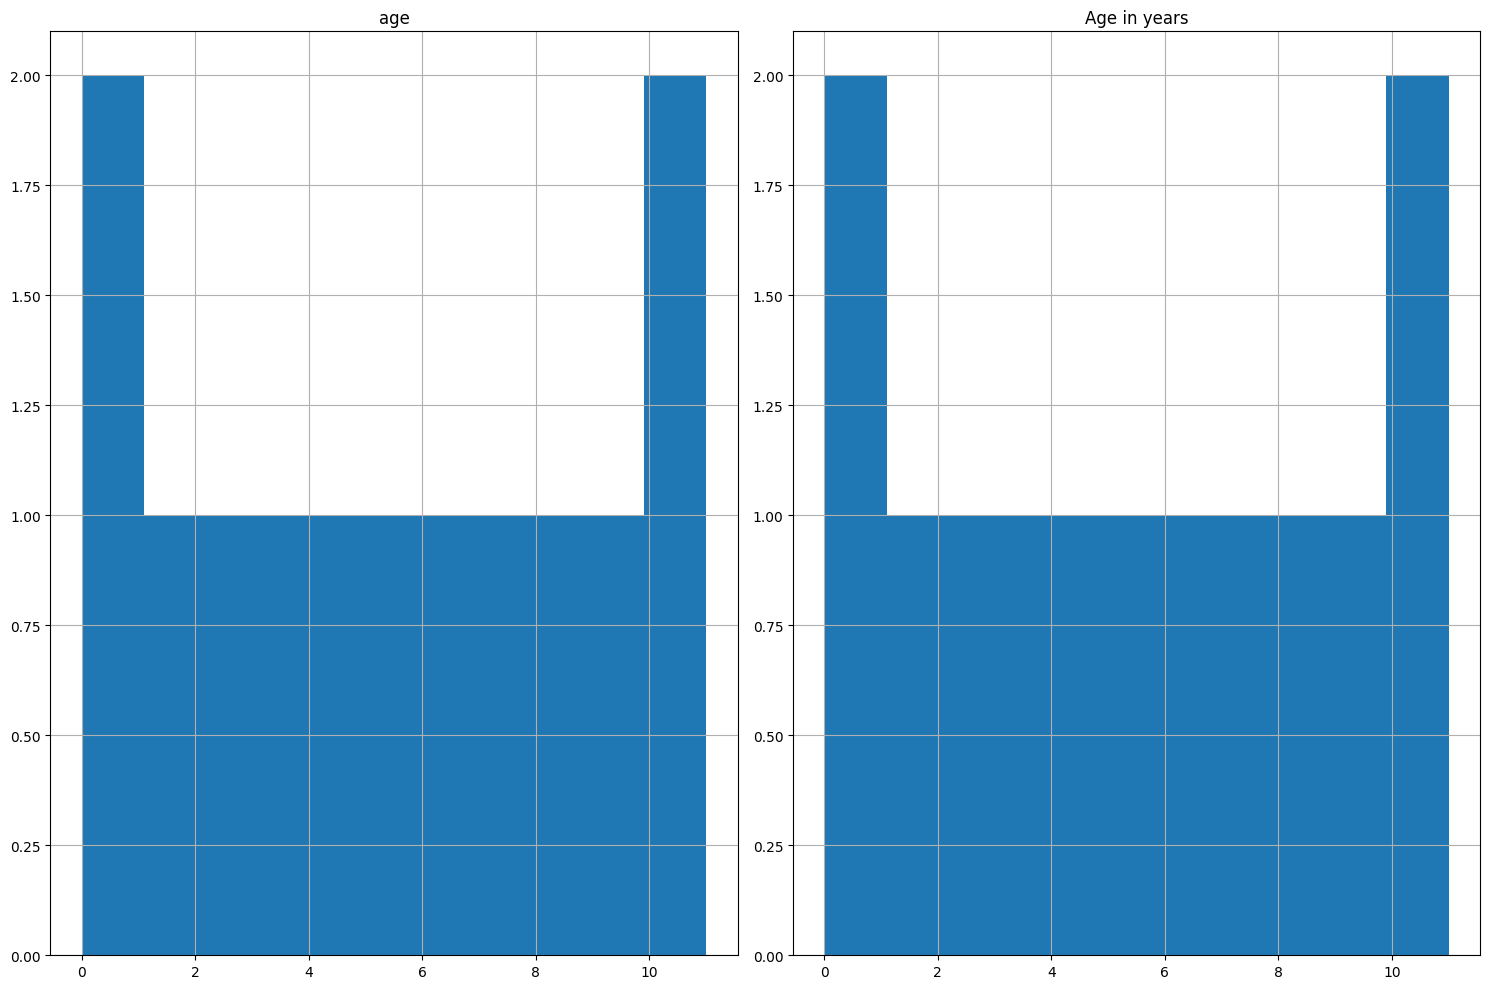

In [ ]:
# Histograms
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

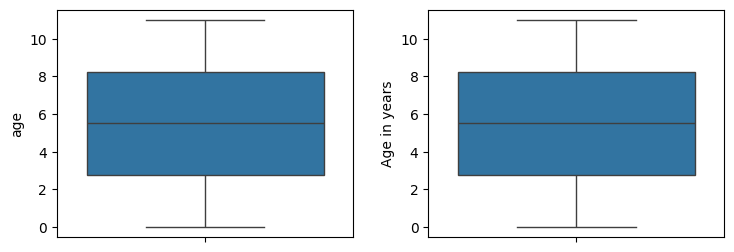

In [ ]:
# Box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=column, data=df)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Feature Engineering
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode any categorical features if present
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
print(df.columns.tolist())
['Age', 'Sex', 'ChestPainType', 'RestingBP', ..., 'HeartDisease']

['age', 'Age in years']


['Age', 'Sex', 'ChestPainType', 'RestingBP', Ellipsis, 'HeartDisease']

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# Check if target is binary or multi-class
print(df.columns) # Print the columns to see the actual names

# Replace 'Heart_Disease' with the correct column name. Using info() output and Global Variables
# Checking the value_counts() of each will give insight if either is the target
print(df['Age in years'].value_counts())
print(df['age'].value_counts())

Index(['age', 'Age in years'], dtype='object')
Age in years
2     1
1     1
3     1
6     1
0     1
7     1
9     1
8     1
4     1
11    1
5     1
10    1
Name: count, dtype: int64
age
0     1
2     1
11    1
1     1
4     1
7     1
10    1
3     1
6     1
8     1
9     1
5     1
Name: count, dtype: int64


In [ ]:
# 4. Decision Tree Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [ ]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: age
[ 0  2 11  1  4  7 10  3  6  8  9  5]

Column: Age in years
[ 2  1  3  6  0  7  9  8  4 11  5 10]


In [ ]:
df.columns = df.columns.str.strip()  # clean spaces
# Assuming 'Age in years' is the target variable based on the initial code.
# If a different column is the target, replace 'Age in years' with the correct column name.

# Check if 'HeartDisease' column exists before dropping it
if 'HeartDisease' in df.columns:
    X = df.drop('HeartDisease', axis=1)
else:
    # Assuming 'Age in years' as the target if 'HeartDisease' is not found
    X = df.drop('Age in years', axis=1)

# Assign target variable
if 'HeartDisease' in df.columns:
    y = df['HeartDisease']
else:
    # Assuming 'Age in years' as the target if 'HeartDisease' is not found
    y = df['Age in years']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
print("Unique target values:", y_test.unique())

Unique target values: [ 5 11  2]


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Check if 'HeartDisease' column exists. If not, use 'Age in years'
target_column = 'HeartDisease' if 'HeartDisease' in df.columns else 'Age in years'

# Assuming 'HeartDisease' or 'Age in years' is the correct target variable
X = df.drop(columns=[target_column], axis=1)
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Accuracy: 0.0
Confusion Matrix:
 [[0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# 5. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [ ]:
from collections import Counter
min_class_size = min(Counter(y_train).values())
print(f"Minimum samples in a class: {min_class_size}")


Minimum samples in a class: 1


In [ ]:
from collections import Counter
print(Counter(y_train))

Counter({4: 1, 7: 1, 3: 1, 1: 1, 10: 1, 0: 1, 8: 1, 6: 1, 9: 1})


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Manually set parameters instead of cross-validation
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    criterion='gini',
    random_state=42
)

dt.fit(X_train, y_train)

# Evaluate
y_pred = dt.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Accuracy: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# 6. Model Evaluation and Visualization
from sklearn.tree import plot_tree

Classes in model: [ 0  1  3  4  6  7  8  9 10]


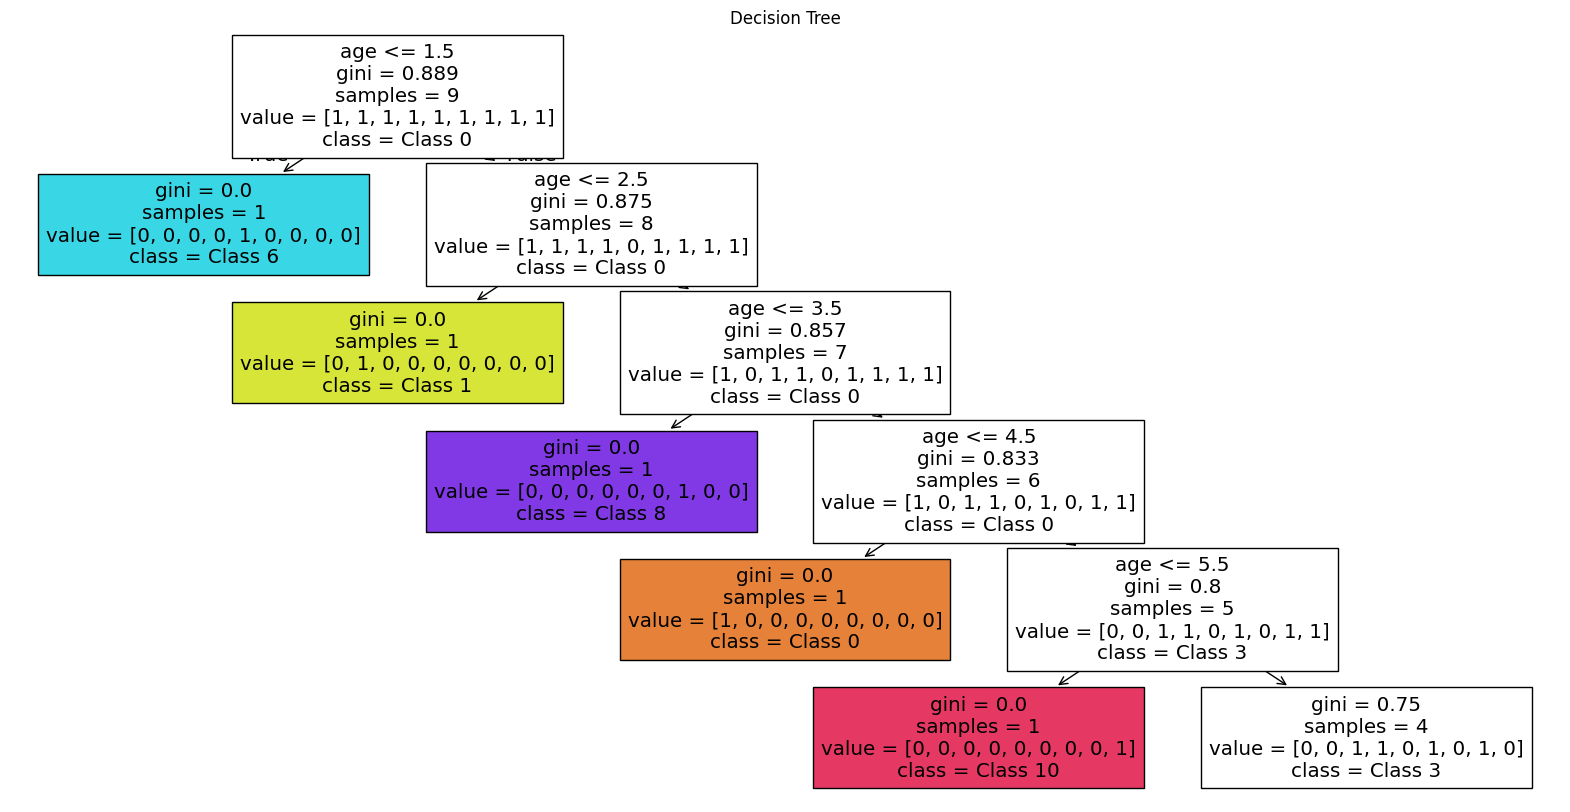

In [ ]:
from sklearn.tree import plot_tree

# Get number of actual classes from model
print("Classes in model:", dt.classes_)

# Provide correct class names
class_names = [f"Class {i}" for i in dt.classes_]

# Now plot
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree")
plt.show()



In [ ]:
# Define feature importance from the trained model `dt`
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)


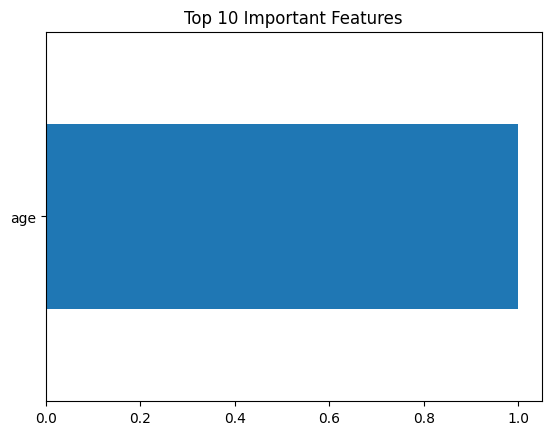

In [ ]:
# Feature importance
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


**1. Common hyperparameters in Decision Trees and what they do:**

max_depth: Limits how deep the tree can go. Prevents overfitting.

min_samples_split: Minimum samples needed to split a node. Higher = simpler tree.

min_samples_leaf: Minimum samples in a leaf. Helps avoid tiny leaves.

max_features: Limits the number of features used to split. Adds randomness.

criterion: Decides how to split (like 'gini' or 'entropy').

👉 These settings control how complex the tree is. Too complex = overfitting. Too simple = underfitting.

**2.**  **Label Encoding vs One-Hot Encoding: Label Encoding **:


Turns categories into
👉 Good for ordered data.

One-Hot Encoding: Turns categories into separate columns with 0s and 1s.

👉 Good for unordered data.

